# Appendix

In [4]:
import numpy as np
import scipy
import itertools
from itertools import chain, combinations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
mpl.rcParams['animation.writer'] = 'ffmpeg'

# Vector Graphics
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

(unc)=
## Background on uncertainty modeling

<div align="justify">

The notion of uncertainty has been studied in various branches of science and scientific disciplines. For a long time, it plays a major role in fields like economics, psychology, and the social sciences, typically in the appearance of applied statistics. Likewise, its importance for artificial intelligence has been recognized very early on[^footNoteIdentifier1], at the latest with the emergence of expert systems, which came along with the need for handling inconsistency, incompleteness, imprecision, and vagueness in knowledge representation ({cite:t}`krus_ua`). More recently, the phenomenon of uncertainty has also attracted a lot of attention in engineering, where it is studied under the notion of "uncertainty quantification"  ({cite:t}`owha_ou12`); interestingly, a distinction between aleatoric and epistemic uncertainty, very much in line with our machine learning perspective, is also made there.

</div>

<div align="justify">

The contemporary literature on uncertainty is rather broad (cf. {numref}`calcu`). In the following, we give a brief overview, specifically focusing on the distinction between set-based and distributional (probabilistic) representations. Against the background of our discussion about aleatoric and epistemic uncertainty, this distinction is arguably important. Roughly speaking, while aleatoric uncertainty is appropriately modeled in terms of probability distributions, one may argue that a set-based approach is more suitable for modeling ignorance and a lack of knowledge, and hence more apt at capturing epistemic uncertainty.

</div>

:::{figure-md} calcu
<img src="pic-calculi.png" alt="calculi" width="600px">

Various uncertainty calculi and common frameworks for uncertainty representation ({cite:t}`dest_up08`). Most of these formalisms are generalizations of standard probability theory an arrow denotes an "is more general than" relationship
:::

### Sets versus distributions

<div align="justify">

A generic way for describing situations of uncertainty is to proceed from an underlying reference set $\Omega$, sometimes called the *frame of discernment* ({cite:t}`shaf_am`). This set consists of all hypotheses, or pieces of precise information, that ought to be distinguished in the current context.  Thus, the elements $\omega \in \Omega$ are exhaustive and mutually exclusive, and one of them, $\omega^*$, corresponds to the truth. For example, $\Omega = \{ H, T \}$ in the case of coin tossing, $\Omega = \{ \text{win}, \text{loss}, \text{tie} \}$ in predicting the outcome of a football match, or $\Omega = \mathbb{R} \times \mathbb{R}_+$ in the estimation of the parameters (expected value and standar deviation) of a normal distribution from data. For ease of exposition and to avoid measure-theoretic complications, we will subsequently assume that $\Omega$ is a discrete (finite or countable) set. 


</div>

In [2]:
football_omega = ["win", "tie","loss"]

<div align="justify">

As an aside, we note that the assumption of exhaustiveness of $\Omega$ could be relaxed. In a classification problem in machine learning, for example, not all possible classes might be known beforehand, or new classes may emerge in the course of time({cite:t}`hend_ab17`; {cite:t}`lian_et18`; {cite:t}`devr_lc18`). In the literature, this is often called the "open world assumption", whereas an exhaustive $\Omega$ is considered as a "closed world" ({cite:t}`deng_ge14`). Although this distinction may look technical at first sight, it has important consequences with regard to the representation and processing of uncertain information, which specifically concern the role of the empty set. While the empty set is logically excluded as a valid piece of information under the closed world assumption, it may suggest that the true state $\omega^*$ is outside $\Omega$ under the open world assumption.

</div>

<div align="justify">

There are two basic ways for expressing uncertain information about $\omega^*$, namely, in terms of *subsets* and in terms of *distributions*. A subset $C \subseteq \Omega$ corresponds to a constraint suggesting that $\omega^* \in C$. Thus, information or knowledge[^footNoteIdentifier2] expressed in this way distinguishes between values that are (at least provisionally) considered possible and those that are definitely excluded. As suggested by common examples such as specifying incomplete information about a numerical quantity in terms of an interval $C= [l,u]$, a set-based representation is appropriate for capturing uncertainty in the sense of *imprecision*. 


Going beyond this rough dichotomy, a distribution assigns a weight $p(\omega)$ to each element $\omega$, which can generally be understood as a degree of belief. At first sight, this appears to be a proper generalization of the set-based approach. Indeed, without any constraints on the weights, each subset $C$ can be characterized in terms of its indicator function $\mathbb{I}_C$ on $\Omega$ (which is a specific distribution assigning a weight of 1 to each $\omega \in C$ and 0 to all $\omega \not\in \Omega$). However, for the specifically important case of probability distributions, this view is actually not valid. 

</div>

<div align="justify">

First, probability distributions need to obey a normalization constraint. In particular, a probability distribution requires the weights to be nonnegative and integrate to 1. A corresponding probability measure on $\Omega$ is a set-function $\Prob: \, 2^\Omega \longrightarrow [0,1]$ such that $\Prob(\emptyset) = 0$, $\Prob(\Omega)=1$, and 

$$
\Prob(A \cup B) = \Prob(A) + \Prob(B) 
$$(addi1)

for all disjoint sets (events) $A, B \subseteq \Omega$. With $\prob(\omega) = \Prob(\{ \omega \})$ for all $\omega \in \Omega$ it follows that $\Prob(A) = \sum_{\omega \in A} \prob(\omega)$, and hence $\sum_{\omega \in \Omega} \prob(\omega)=1$. Since the set-based approach does not (need to) satify this constraint, it is no longer a special case.

Let us now define a probability distribution for the outcomes of a football match, i.e. $\Omega = \{ \text{win}, \text{loss}, \text{tie} \}$ with 
$\Prob(\{\text{win} \}) = 0.5$ and $\Prob(\{\text{loss} \}) = \Prob(\{\text{tie} \}) = 0.25$. Then we can easily calculate the probability for all subsets $S\subseteq \Omega$:

</div>

In [5]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def probability_distribution_football(event):
    match event:
        case "":
            return 0
        case "win":
            return 0.5
        case "tie":
            return 0.25
        case "loss":
            return 0.25
        case _:
            return sum([probability_distribution_football(e) for e in event])

probability_values = {
    x:round(probability_distribution_football(x),3)
    for x in list(powerset(football_omega))
}
probability_values

{(): 0,
 ('win',): 0.5,
 ('tie',): 0.25,
 ('loss',): 0.25,
 ('win', 'tie'): 0.75,
 ('win', 'loss'): 0.75,
 ('tie', 'loss'): 0.5,
 ('win', 'tie', 'loss'): 1.0}

| S    | $\Prob(S)$    |
| :--- | ---: |
| {}    | 0 |
| {win} | 0.5|
| {loss} |0.25 |
| {tie} | 0.25 |
| {win,tie} |   0.75 |
| {win,loss} | 0.75 |
| {loss,tie} | 0.5 |
| {win,loss,tie} | 1|

<div align="justify">

Second, in addition to the question of how information is represented, it is of course important to ask how the information is processed. In this regard, the probabilistic calculus differs fundamentally from constraint-based (set-based) information processing. The characteristic property of probability is its additivity {eq}`addi1`, suggesting that the belief in the disjunction (union) of two (disjoint) events $A$ and $B$ is the sum of the belief in either of them. In contrast to this, the set-based approach is more in line with a logical interpretation and calculus. Interpreting a constraint $C$ as a logical proposition $(\omega \in C)$, an event $A \subseteq \Omega$ is possible as soon as $A \cap C \neq \emptyset$ and impossible otherwise. Thus, the information $(\omega \in C)$ can be associated with a set-function $\Pi:\, 2^\Omega \longrightarrow \{ 0, 1 \}$ such that $\Pi(A) = \llbracket A \cap C \neq \emptyset \rrbracket$. Obviously, this set-function satisfies $\Pi(\emptyset) = 0$, $\Pi(\Omega) = 1$, and 

$$
\Pi(A \cup B) = \max \big( \Pi(A) , \Pi(B) \big) 
$$(maxi1)

Thus, $\Pi$ is "maxitive" instead of additive ({cite:t}`shil_mm71`;{cite:t}`dubo_pt06`). Roughly speaking, an event $A$ is evaluated according to its (logical) consistency with a constraint $C$, whereas in probability theory, an event $A$ is evaluated in terms of its probability of occurrence. The latter is reflected by the probability mass assigned to $A$, and requires a comparison of this mass with the mass of other events (since only one outcome $\omega$ is possible, the elementary events compete with each other). Consequently, the calculus of probability, including rules for combination of information, conditioning, etc., is quite different from the corresponding calculus of constraint-based information processing ({cite:t}`dubo_pt06`).

For our football example we choose $C = \{ \text{win}, \text{tie} \}$ and the resulting values of the subsets can be easily computed:
</div>

In [6]:
constraint = ["win","tie"]

def pi_function(event):
    # the np.any takes over the role of the max()
    # the (1*) is to convert the output directly into a number
    return 1* np.any([e in constraint for e in event])


constraint_based_information = {
    x:round(pi_function(x),3)
    for x in list(powerset(football_omega))
}
constraint_based_information

{(): 0,
 ('win',): 1,
 ('tie',): 1,
 ('loss',): 0,
 ('win', 'tie'): 1,
 ('win', 'loss'): 1,
 ('tie', 'loss'): 1,
 ('win', 'tie', 'loss'): 1}

| S    | $\Pi(S)$    |
| :--- | ---: |
| {}    | 0  |
| {win} | 1 |
| {loss} | 0 |
| {tie} | 1 |
| {win,tie} |   1 |
| {win,loss} | 1 |
| {loss,tie} | 1 |
| {win,loss,tie} | 1|

### Sets of distributions

<div align="justify">

Given the complementary nature of sets and distributions, and the observation that both have advantages and disadvantages, one may wonder whether the two could not be combined in a meaningful way. Indeed, the argument that a single (probability) distribution is not enough for representing uncertain knowledge is quite prominent in the literature, and many generalized theories of uncertainty can be considered as a combination of that kind ({cite:t}`pdubo_pt`;{cite:t}`wall_sr`;{cite:t}`shaf_am`;{cite:t}`smet_tt94`). 

Since we are specifically interested in aleatoric and epistemic uncertainty, and since these two types of uncertainty are reasonably captured in terms of sets and probability distributions, respectively, a natural idea is to consider *sets of probability distributions*. In the literature on imprecise probability, these are also called [credal sets](../chapter-credal_sets/credal_sets) ({cite:t}`cozm_cn00`;{cite:t}`zaff_tn02`). An illustration is given in {numref}`bary1`, where probability distributions on $\Omega = \{ a,b,c \}$ are represented as points in a Barycentric coordinate systems. A credal set then corresponds to a subset of such points, suggesting a lack of knowledge about the true distribution but restricting it in terms of a set of possible candidates.  

</div>

:::{figure-md} bary1
<img src="pic-bary.png" alt="bary" width="600px">

Probability distributions on $\Omega = \{ a,b,c \}$ as points in a Barycentric coordinate system: Precise knowledge (left) versus incomplete knowledge (middle) and complete ignorance (right) about the true distribution.
:::

<div align="justify">

Credal sets are typically assumed to be convex subsets of the class $\mathbb{P}$ of all probability distributions on $\Omega$. Such sets can be specified in different ways, for example in terms of upper and lower bounds on the probabilities $\Prob(A)$ of events $A \subseteq \Omega$. A specifically simple approach (albeit of limited expressivity) is the use of so-called *possibility distributions* and related *possibility measures* ({cite:t}`dubo_pt`). A possibility distribution is a mapping $\pi: \, \Omega \longrightarrow [0,1]$, and the associated measure is given by 

$$
\Pi: \, 2^\Omega \longrightarrow [0,1], \, A \mapsto \sup_{\omega \in A} \pi(\omega) \, .
$$

</div>

<div align="justify">

A measure of that kind can be interpreted as an upper bound, and thus defines a set $\mathcal{P}$ of dominated probability distributions:

$$
\mathcal{P} := \big\{ \Prob \in \mathbb{P} \vert \Prob(A) \leq \Pi(A) \text{ for all } A \subseteq \Omega \big\}
$$

Formally, a possibility measure on $\Omega$ satisfies $\Pi(\emptyset)=0$, $\Pi(\Omega)=1$, and $\Pi(A \cup B) = \max(\Pi(A), \Pi(B))$ for all $A, B \subseteq \Omega$. Thus, it generalizes the maxitivity {eq}`maxi1` of sets in the sense that $\Pi$ is not (necessarily) an indicator function, i.e., $\Pi(A)$ is in $[0,1]$ and not restricted to $\{ 0, 1 \}$. A related *necessity measure* is defined as $N(A) = 1 - \Pi(\bar{A})$, where $\bar{A} = \Omega \setminus A$. Thus, an event $A$ is plausible insofar as the complement of $A$ is not necessary. Or, stated differently, an event $A$ necessarily occurs if the complement of $A$ is not possible. 

Let us again compute the possibility measures $\Pi$ for the football example with $\pi(\text{win}) = 0.9, \pi(\text{tie}) = 0.7$ and $\pi(\text{loss}) = 0.3$:

</div>

In [8]:
def possibility_measure_football(event):
    match event:
        case "":
            return 0
        case "win":
            return 0.9
        case "tie":
            return 0.7
        case "loss":
            return 0.3
        case _:
            values = [probability_distribution_football(e) for e in event]
            if len(values) == 0:
                return 0
            else:
                return max([possibility_measure_football(e) for e in event])

possibility_values = {
    x:round(possibility_measure_football(x),3)
    for x in list(powerset(football_omega))
}
possibility_values

{(): 0,
 ('win',): 0.9,
 ('tie',): 0.7,
 ('loss',): 0.3,
 ('win', 'tie'): 0.9,
 ('win', 'loss'): 0.9,
 ('tie', 'loss'): 0.7,
 ('win', 'tie', 'loss'): 0.9}

| S    | $\Pi(S)$    |
| :--- | ---: |
| {}    | 0|
| {win} | 0.9 |
| {loss} | 0.3 |
| {tie} | 0.7 |
| {win,tie} | 0.9 |
| {win,loss} | 0.9 |
| {loss,tie} | 0.7 |
| {win,loss,tie} | 0.9|

<div align="justify">

We take $C = \{ \text{win}, \text{tie} \}$ as an example. So the complement of $C$ is $\bar{C} = \Omega \setminus C = \{ \text{loss}\}$. The neccessity measure $N(C) = 1 - \Pi(\bar{C}) = 0.7$

</div>

<div align="justify">

In a sense, possibility theory combines aspects of both set-based and distributional approaches. In fact, a possibility distribution can be seen as both a generalized set (in which elements can have graded degrees of membership) and a non-additive measure. Just like a probability, it allows for expressing graded degrees of belief (instead of merely distinguishing possible from impossible events), but its calculus is maxitive instead of additive[^footNoteIdentifier3].

The dual pair of measures $(N, \Pi)$ allows for expressing ignorance in a proper way, mainly because $A$ can be declared plausible without declaring $\bar{A}$ implausible. In particular, $\Pi(A) \equiv 1$ on $2^\Omega \setminus \emptyset$ models complete ignorance: Everything is fully plausible, and hence nothing is necessary ($N(A) = 1 - \Pi(\bar{A}) = 0$ for all $A$). A probability measure, on the other hand, is self-dual in the sense that $\Prob(A) = 1 - \Prob(\bar{A})$. Thus, a probability measure is playing both roles simultaneously, namely the role of the possibility and the role of the necessity measure. Therefore, it is more constrained than a representation $(N, \Pi)$. In a sense, probability and possibility distributions can be seen as two extremes on the scale of uncertainty representations[^footNoteIdentifier4].

</div>

In [9]:
def necessity_measure_football(event):
    event_complement  = [e for e in football_omega if e not in event]
    return 1 - possibility_measure_football(event_complement)

necessity_values = {
    x: round(necessity_measure_football(x),3)
    for x in list(powerset(football_omega))
}
necessity_values

{(): 0.1,
 ('win',): 0.3,
 ('tie',): 0.1,
 ('loss',): 0.1,
 ('win', 'tie'): 0.7,
 ('win', 'loss'): 0.3,
 ('tie', 'loss'): 0.1,
 ('win', 'tie', 'loss'): 1}

| S    | $\Pi(S)$    | $N(S)$ |
| :--- | --- | ---:| 
| {}    | 0| 0.1|
| {win} | 0.9 | 0.3|
| {loss} | 0.7 |0.1 | 
| {tie} | 0.3 | 0.1|
| {win,tie} | 0.9 | 0.7|
| {win,loss} | 0.9 | 0.3|
| {loss,tie} | 0.7 | 0.1|
| {win,loss,tie} | 0.9 | 1|

(dos)=
### Distributions of sets

<div align="justify">

Sets and distributions can also be combined the other way around, namely in terms of distributions of sets. Formalisms based on this idea include the calculus of *random sets* ({cite:t}`math_rs`;{cite:t}`nguy_or78`) as well as the Dempster-Shafer theory of evidence ({cite:t}`shaf_am`).

In evidence theory, uncertain information is again expressed in terms of a dual pair of measures on $\Omega$, a measure of *plausibility* and a measure of *belief*. Both can be derived from an underlying *mass function* or *basic belief assignment* $m:\, 2^\Omega \longrightarrow [0,1]$, for which $m(\emptyset) = 0$ and $\sum_{B \subseteq \Omega} m(B) = 1$. Obviously, $m$ defines a probability distribution on the subsets of $\Omega$. Thus, instead of a single set or constraint $C$, like in the set-based approach, we are now dealing with a set of such constraints, each one being assigned a weight $m(C)$. Each $C \subseteq \Omega$ such that $m(C) > 0$ is called a *focal element* and represents a single piece of evidence (in favor of $\omega^* \in C$). Assigning masses to subsets $C$ instead of single elements $\omega$ allows for combining randomness and imprecision. 

Let us now define a mass assignment $m$ with $m(\{\text{win}\}) = 0.3, m(\emptyset) = 0, m(\{\text{win}, \text{tie}\}) = 0.5 $ and $m(\{ \text{tie}, \text{loss} \}) = 0.2$. $\emptyset$ is not a focal element because the weight is not > 0.

</div>

<div align="justify">

A plausibility and belief function are derived from a mass function $m$ as follows: 

$$
\on{Pl}(A) := \sum_{B \cap A \neq \emptyset} m(B)  \, ,  \quad
\on{Bel}(A) := \sum_{B \subseteq A } m(B) \, .
$$

So the belief and plausibility values for the defined mass assignments are:

</div>

In [ ]:
def mass_assignment(events):
    match events:
        case ("win",):
            return 0.3
        case ("win","tie"):
            return 0.5
        case ("tie","loss"):
            return 0.2
        case _:
            return 0
        
def plausibility_measure(events):
    plausibility = 0
    for e in list(powerset(football_omega)):
        if set(e).intersection(set(events)) != set():
            plausibility += mass_assignment(e)
    return plausibility

def belief_measure(events):
    belief = 0
    for e in list(powerset(events)):
        belief += mass_assignment(e)
    return belief

plausibility_values = {
    x: round(plausibility_measure(x),3)
    for x in list(powerset(football_omega))
}
belief_values = {    
    x: round(belief_measure(x),3)
    for x in list(powerset(football_omega))
}
plausibility_values, belief_values

({(): 0,
  ('win',): 0.8,
  ('tie',): 0.7,
  ('loss',): 0.2,
  ('win', 'tie'): 1.0,
  ('win', 'loss'): 1.0,
  ('tie', 'loss'): 0.7,
  ('win', 'tie', 'loss'): 1.0},
 {(): 0,
  ('win',): 0.3,
  ('tie',): 0,
  ('loss',): 0,
  ('win', 'tie'): 0.8,
  ('win', 'loss'): 0.3,
  ('tie', 'loss'): 0.2,
  ('win', 'tie', 'loss'): 1.0})

| S    | $\on{Pl}(S)$    | $\on{Bel}(S)$ |
| :--- | --- | ---:| 
| {}    | 0| 0|
| {win} | 0.8 | 0.3|
| {loss} | 0.2 |0 | 
| {tie} | 0.7 | 0|
| {win,tie} | 1 | 0.8|
| {win,loss} | 1 | 0.3|
| {loss,tie} | 0.7 | 0.2|
| {win,loss,tie} | 1 | 1|

<div align="justify">

Plausibility (or belief) functions indeed generalize both probability and possibility distributions. A probability distribution is obtained in the case where all focal elements are singleton sets. We still take the football match as an example. $\Omega = \{ \text{win}, \text{loss}, \text{tie} \}$ and $m(\{\text{win} \}) = 0.5$ and $m(\{\text{loss} \}) =0.2$ $m(\{\text{tie} \}) = 0.3$, this is actually a probability distribution. 

A possibility measure is obtained as a special case of a plausibility measure (and, correspondingly, a necessity measure as a special case of a belief measure) for a mass function the focal sets of which are nested, i.e., such that $C_1 \subset C_2 \subset \cdots \subset C_r$. The corresponding possibility distribution is the *contour function* of the plausibility measure: $\pi(\omega) = \on{Pl}(\{ \omega\}) := \sum_{C : \, \omega \in C} m(C)$ for all $\omega \in \Omega$. Thus, $\pi(\omega)$ can be interpreted as the probability that $\omega$ is contained in a subset $C$ that is randomly chosen according to the distribution $m$ (see {numref}`contour1` for an illustration).  

We further calculte the possibility distribution based on the previous mass assignment: $m(\{\text{win}\}) = 0.3, m(\{\text{win}, \text{tie}\}) = 0.5 $ and $m(\{ \text{tie}, \text{loss} \}) = 0.2$ and $\pi(\text{win}) = \on{Pl}(\{ \text{win}\}) := m(\{\text{win}\}) + m(\{\text{win}, \text{tie}\}) = 0.8$. Below is the visualization of possibility distribution. 

</div>

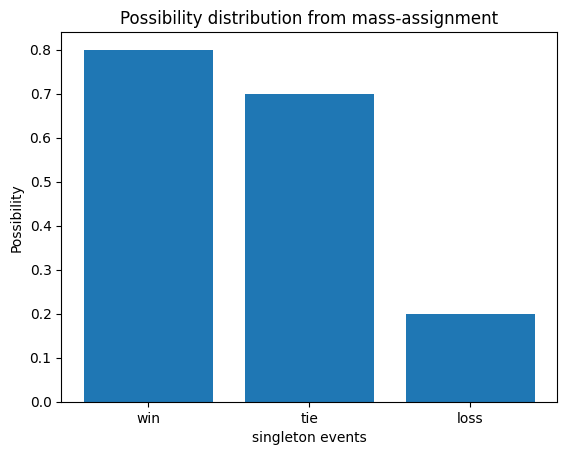

In [ ]:
possibility_values = {
    x:plausibility_measure((x,))
    for x in football_omega
}
possibility_distribution = possibility_values.values()

fig, ax = plt.subplots()

ax.bar(x=football_omega,height=possibility_distribution)

ax.set_title("Possibility distribution from mass-assignment")
ax.set_xlabel("Events")
ax.set_ylabel("Possibility")
plt.show()

:::{figure-md} contour1
<img src="pic-contour.png" alt="contour" width="600px">

Possibility distribution as a contour function of a basic belief assignment $m$ (values assigned to focal sets on the right). In this example, $\pi(\omega_5)=1$, because $\omega_5$ is contained in all focal sets, whereas $\pi(\omega_3)=0.6$.
:::

<div align="justify">

Note that we have obtained a possibility distribution in two ways and for two different interpretations, representing a set of distributions as well as a distribution of sets. One concrete way to define a possibility distribution $\pi$ in a data-driven way, which is specifically interesting in the context of statistical inference, is in terms of the *normalized* or *relative likelihood*. Consider the case where $\omega^*$ is the parameter of a probability distribution, and we are interested in estimating this parameter based on observed data $\mathcal{D}$; in other words, we are interested in identifying the distribution within the family $\{ \Prob_\omega \with \omega \in \Omega \}$ from which the data was generated. The likelihood function is then given by $L(\omega; \mathcal{D}) := \Prob_\omega(\mathcal{D})$, and the normalized likelihood as 

$$
L^{n}(\omega; \mathcal{D}) := \frac{L(\omega; \mathcal{D})}{\sup_{\omega' \in \Omega} L(\omega; \mathcal{D})} \enspace .
$$

This function can be taken as the contour function of a (consonant) plausibility function $\pi$, i.e., $\pi(\omega) = L^{n}(\omega; \mathcal{D})$ for all $\omega \in \Omega$; the focal sets then simply correspond to the confidence intervals that can be extracted from the likelihood function, which are of the form $C_\alpha = \{ \omega \with L^{n}(\omega; \mathcal{D}) \geq \alpha \}$. This is an interesting illustration of the idea of a distribution of sets: A confidence interval can be seen as a constraint, suggesting that the true parameter is located inside that interval. However, a single (deterministic) constraint is not meaningful, since there is a tradeoff between the correctness and the precision of the constraint. Working with a set of constraints---or, say, a flexible constraint---is a viable alternative.

</div>

<div align="justify">

Note that we have obtained a possibility distribution in two ways and for two different interpretations, representing a set of distributions as well as a distribution of sets. One concrete way to define a possibility distribution $\pi$ in a data-driven way, which is specifically interesting in the context of statistical inference, is in terms of the *normalized* or *relative likelihood*. Consider the case where $\omega^*$ is the parameter of a probability distribution, and we are interested in estimating this parameter based on observed data $\mathcal{D}$; in other words, we are interested in identifying the distribution within the family $\{ \Prob_\omega \with \omega \in \Omega \}$ from which the data was generated. The likelihood function is then given by $L(\omega; \mathcal{D}) := \Prob_\omega(\mathcal{D})$, and the normalized likelihood as 

$$
L^{n}(\omega; \mathcal{D}) := \frac{L(\omega; \mathcal{D})}{\sup_{\omega' \in \Omega} L(\omega; \mathcal{D})} \enspace .
$$

This function can be taken as the contour function of a (consonant) plausibility function $\pi$, i.e., $\pi(\omega) = L^{n}(\omega; \mathcal{D})$ for all $\omega \in \Omega$; the focal sets then simply correspond to the confidence intervals that can be extracted from the likelihood function, which are of the form $C_\alpha = \{ \omega \with L^{n}(\omega; \mathcal{D}) \geq \alpha \}$. This is an interesting illustration of the idea of a distribution of sets: A confidence interval can be seen as a constraint, suggesting that the true parameter is located inside that interval. However, a single (deterministic) constraint is not meaningful, since there is a tradeoff between the correctness and the precision of the constraint. Working with a set of constraints---or, say, a flexible constraint---is a viable alternative.

</div>

<div align="justify">

The normalized likelihood was originally introduced by {cite:t}`shaf_am`, and has been justified axiomatically in the context of statistical inference by {cite:t}`wass_bf90`. Further arguments in favor of using the relative likelihood as the contour function of a (consonant) plausibility function are provided by {cite:t}`deno_lb14`, who shows that it can be derived from three basic principles: the likelihood principle, compatibility with Bayes' rule, and the so-called minimal commitment principle. See also ({cite:t}`dubo_as97`) and ({cite:t}`catt_ls05`) for a discussion of the normalized likelihood in the context of possibility theory.  

</div>

(maxmin)=
## Max-min versus sum-product aggregation 

<div align="justify">

Recall the definition of plausibility degrees $\pi(y | \vec{x}_{q})$ as introduced in Section {ref}`uqnl`.
The computation of $\pi(+1 \given \vec{x}_{q})$ according to {eq}`plaus` is illustrated in {numref}`inf1`, where the hypothesis space $\cH$ is shown schematically as one of the axes. In comparison to Bayesian inference {eq}`pd`, two important differences are notable: 

- First, evidence of hypotheses is represented in terms of normalized likelihood $\pi_{\cH}(h)$ instead of posterior probabilities $\prob(h \given \cD)$, and support for a class $y$ in terms of $\pi(y \given h, \vec{x}_{q})$ instead of probabilities $h(\vec{x}_{q}) = \prob(y \given \vec{x}_{q})$. 

- Second, the "sum-product aggregation" in Bayesian inference is replaced by a "max-min aggregation". 

</div>

:::{figure-md} inf1
<img src="pic-inference.jpg" alt="settings" width="600px">

The plausibility $\pi(+1 \given \vec{x}_{q})$ of the positive class is given by the maximum (dashed line) over the pointwise minima of the plausibility of hypotheses $h$ (blue line) and the corresponding plausibility of the positive class given $h$ (green line).
:::

<div align="justify">

More formally, the meaning of sum-product aggregation is that {eq}`pd` corresponds to the computation of the standard (Lebesque) integral of the class probability $\prob(y \given \vec{x}_{q})$ with respect to the (posterior) probability distribution $\prob(h \given \cD)$. Here, instead, the definition of $\pi(y \given \vec{x}_{q})$ corresponds to the Sugeno integral ({cite:t}`suge_to`) of the support $\pi(y \given h, \vec{x}_{q})$ with respect to the possibility measure $\Pi_{\cH}$ induced by the distribution {eq}`noli` on $\cH$:

$$
\pi(y \vert \vec{x}_{q}) =  S \!\!\!\!\!\! \int_{\cH} \pi(y \vert h, \vec{x}_{q}) \circ \Pi_{\cH}
$$

In general, given a measurable space $(X,\mathcal{A})$ and an $\mathcal{A}$-measurable function $f:\, X \longrightarrow [0,1]$, the Sugeno integral of $f$ with respect to a monotone measure $g$ (i.e., a measure on $\mathcal{A}$ such that $g(\emptyset) = 0$, $g(X) = 1$, and $g(A) \leq g(B)$ for $A \subseteq B$) is defined as

$$
S \!\!\!\!\!\! \int_X f(x) \circ g := \sup_{A \in \mathcal{A}} \left[ \min \left( \min_{x \in A} f(x) , g(A) \right) \right] = \sup_{\alpha \in [0,1]} \Big[ \min \big( \alpha , g(F_\alpha) \big) \Big] \, , 
$$

where $F_\alpha := \{ x \with f(x) \geq \alpha \}$.

In comparison to sum-product aggregation, max-min aggregation avoids the loss of information due to averaging and is more in line with the "existential" aggregation in version space learning. In fact, it can be seen as a graded generalization of {eq}`cbi`. Note that max-min inference requires the two measures $\pi_{\cH}(h)$ and $\pi(+1 \vert h, \vec{x}_{q})$ to be commensurable. This is why the normalization of the likelihood according to {eq}`noli` is important. 


Compared to MAP inference {eq}`map`, max-min inference takes more information into account. Indeed, MAP inference only looks at the probability of hypotheses but ignores the probabilities assigned to the classes. In contrast, a class can be considered plausible according to {eq}`plaus` even if not being strongly supported by the most likely hypothesis $h^{ml}$---this merely requires sufficient support by another hypothesis $h$, which is not much less likely than $h^{ml}$. 

</div>

## Excursus: Hypothesis testing
<div align="justify">

Let us first revise the basic idea of hypothesis testing, the underlying concept of conformal prediction.
Assume you have been invited to a friends home and let a food delivery bring delicious food.
Let us call the friend B.\
Both of you agree to have a coin decide which one has to pay the bill.
Yet only one coin toss would be unfair, B suggests to toss a coin 20 times.
The proportion of *heads* in the sequence would be the amount you have to pay of the bill and the proportion of *tails* is the amount your friend has to pay.
Because of modern days you do not have a coin with you and you have to take the coin of B.
Having a certain doubt B wants to only the the faith decide on the bill split you want to check whether he uses a fair coin.
With your basic knowledge in statistics you tackle this problem with hypothesis testing.

</div>

<div align="justify">

Firstly you formalize the problem. The assumption of a fair coin is your null hypothesis $H_0: \theta = \frac{1}{2}$ and the alternative hypothesis $H_1: \theta \neq \frac{1}{2}$. If B provides a fair coin the probability of having k heads in a sequence with 20 coin flips should follow the following distribution.

$$
P(H = k | H_0) = B(k, \frac{1}{2}) = \binom{20}{k}(\frac{1}{2})^k(\frac{1}{2})^{N-k} = \binom{20}{k}(\frac{1}{2})^N
$$

In the following we define the probability distribution for general sequence with N realizations.

</div>

In [ ]:
def binomial_distribution(k, p, N=20):
    # denote that this function works with both k being integer and k being an array of integers
    binomial_coefficient = scipy.special.factorial(N) / (
        scipy.special.factorial(k) * scipy.special.factorial(N - k)
    )
    return binomial_coefficient *( (p) ** k )* ((1 - p) ** (N - k))

<div align="justify">

Let us visualize this distibution for our 20 coin flips.

</div>

In [ ]:
coin_flips = 20
head_amount = np.arange(0, coin_flips+1, 1)
probabilities = binomial_distribution(head_amount, 0.5, coin_flips)

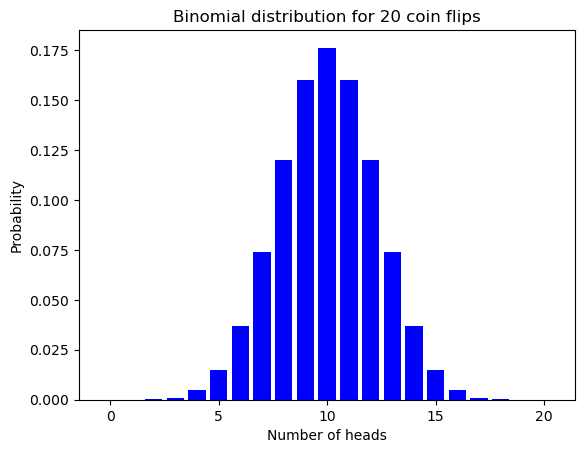

In [ ]:
plt.bar(x=head_amount, height=probabilities, linewidth=0.7, color="blue")
plt.title(f"Binomial distribution for {coin_flips} coin flips")
plt.xlabel("Number of heads")
plt.ylabel("Probability")
plt.show()

<div align="justify">


But because we do not want to accuse our friend without statistically certainty, we want to have a guarantee that we only at most $\epsilon$ probable falsely accuse him. In statistics we denote this as rejecting the null hypothesis $H_0$ with a significance niveau of $\epsilon$.
Therefore we choose a threshold $r$ for the amount of heads such that

$$
    A:=P(H \leq r \lor H \geq 20-r) = \sum_{k=0}^r B(k,\frac{1}{2}) + \sum_{k=20-r}^{20} B(k,\frac{1}{2}) \leq \epsilon
$$(probabilityEquation)

In the  following we show this in an animation, where the red area depicts the probability in {eq}`probabilityEquation`.

</div>

In [ ]:
fig,ax = plt.subplots()
coin_flips = 20
rc("animation", html="html5")

barcollection = ax.bar(x=head_amount, 
        height=probabilities,
        linewidth=.7,
        color="green")

def animate(number_of_heads):
    probability_sum = 0
    for i in range(coin_flips):
        if i <= number_of_heads:
            # the left first bars must be color changed
            barcollection[i].set_color('r')
        if i >= coin_flips - (number_of_heads):
            barcollection[i].set_color('r')
    probability_sum = sum(probabilities[:number_of_heads+1] + probabilities[coin_flips-number_of_heads:])
    
    ax.set_title(f" A = {round(probability_sum,4)}, r = {number_of_heads},")
anim = animation.FuncAnimation(fig, animate, frames=coin_flips//2,interval=1000)
plt.close()
anim

<div align="justify">

If we would then want to have a significance of $\epsilon$ = 5\% we would have r = 5.

</div>

```{note}
Nothing can be concluded if we do not reject the null hypothesis. 
For example with $\epsilon$ = 1% and r = 5, then $A > \epsilon$ so that we can not reject the null hypothesis. 
In particular this does not imply that $H_0$ is accepted.
```

## Excursus: Exchangeability
<div align="justify">

The concept of *exchangeability* can be seen as a relaxation of the typical *i.i.d* (independently and identically distributed) assumption. Informally is means that the ordering of the random variables in the sequence is irrelevant for the joint probability. \
More formally, a finite sequence of random variables $X_1, \dots, X_N$ is **exchangeable**, if 

$$
    P(X_1 = x_1, X_2 = x_2, \dots, X_N = x_N) = P(X_{\sigma(1)} = x_1, X_{\sigma(2)} = x_2, \dots, X_{\sigma(N)} = x_N)
$$

for every permutation  $\sigma : [N] \rightarrow [N]$.
For an example we think of an urn with three red and two blue balls. 
We seek to draw all five from the urn **without** replacement. 
Pouring the example into a probabilistic framework the i-th drawn ball is denoted by a random variable $X_i = 1$ if the ball is red and $X_i = 0$ otherwise.
We now are interested in the probability of any sequence $X_1 = x_1, \dots, X_5 = x_5$.

</div>

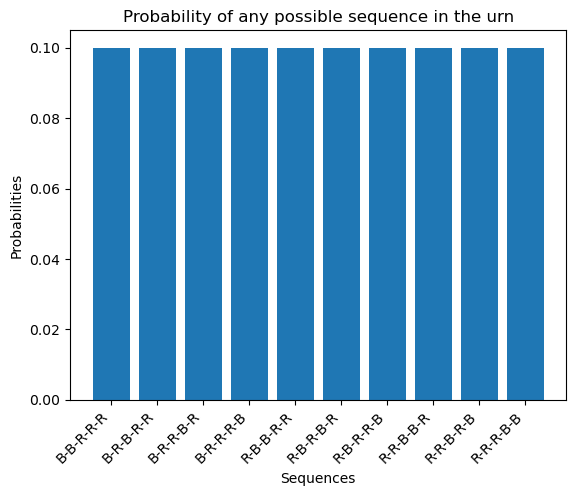

In [ ]:
urn = ['R','R','R','B','B']
def get_all_sequences(urn):
    a = np.array(list(map(lambda x: ' '.join(x),itertools.permutations(urn,len(urn)))))
    b = np.unique(a)
    return list(map(lambda x: x.split(' '), b))

def calculate_probability_sequence(urn, sequence):
    tmp = urn.copy()
    probability = 1
    for elem in sequence:
        probability *= tmp.count(elem) / len(tmp)
        tmp.remove(elem)
    return probability

def visualize_all_probabilities(urn):
    sequences, probabilites= list(zip(
            *[('-'.join(sequence), calculate_probability_sequence(urn, sequence))
                for sequence in get_all_sequences(urn)]
        ))
    fig,ax = plt.subplots()
    
    ax.bar(x=sequences, height=probabilites)
    
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    ax.set_xlabel("Sequences")
    ax.set_ylabel("Probabilities")
    ax.set_title("Probability of any possible sequence in the urn")
    
    plt.show()

visualize_all_probabilities(urn)

In [ ]:
##### Jupyter Book auxiliary########
from myst_nb import glue
probability_each_sequence_independency = round(scipy.stats.binom(len(urn),urn.count(urn[0])/len(urn)).pmf(urn.count(urn[0])), 3)
glue("independent_prob", probability_each_sequence_independency, display=False)
###################################

<div align="justify">

While it is not surprising that each sequence has equal probability it shows us that this sequence fulfills the property of *exchangeability*.
Also the individual random variables are not independent, as the $i$-th realisation drawn ball influences the probability of the next $(i+1)$-th realisation. 
If the random variables were independent (resulting in a binomial distribution), the $P(X_1,\dots, X_5) =$ {glue:}`independent_prob`.

</div>

[^footNoteIdentifier1]:The "Annual Conference on Uncertainty in Artificial Intelligence" (UAI) was launched in the mid 1980s.

[^footNoteIdentifier2]:We do not distinguish between the notions of information and knowledge in this paper.

[^footNoteIdentifier3]: For this reason, possibility measures can also be defined on non-numerical, purely ordinal structures.

[^footNoteIdentifier4]:Strictly speaking, possibilities are not more expressive than probabilities, since possibility distributions cannot model degenerate probability distributions: $\Pi \neq N$ unless $\Pi(\{ \omega^* \}) = 1$ for some $\omega^* \in \Omega$ and $\Pi(\{ \omega \}) = 0$ otherwise.